In [1]:
# Deep Learning Libraries

from functools import partial
import keras as keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, GlobalMaxPool1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, Activation, concatenate, SpatialDropout1D, TimeDistributed, Layer
from keras.utils import to_categorical
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import GroupShuffleSplit
from functools import partial
from keras.callbacks import *
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score

import sklearn
from sklearn.metrics import confusion_matrix
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import ttest_rel, mannwhitneyu

# General Libraries
from scipy.io import loadmat, savemat
from scipy.fft import fft, fftfreq, ifft
import h5py
import os

Using TensorFlow backend.


# Import Explainability Results

In [2]:
# Get Model A Explanations
load_path = "/data/users2/cellis42/Spectral_Explainability/PreTraining/Journal/Models/Models_v2/Importance/model_a_importance_seed3.mat"
spectral_importance_a = np.squeeze(loadmat(load_path)["spectral_importance"])
spatial_importance_a = np.squeeze(loadmat(load_path)["spatial_importance"])

In [3]:
# Get Model B Explanations
load_path = "/data/users2/cellis42/Spectral_Explainability/PreTraining/Journal/Models/Models_v2/Importance/model_b_importance_seed3.mat"
spectral_importance_b = np.squeeze(loadmat(load_path)["spectral_importance"])
spatial_importance_b = np.squeeze(loadmat(load_path)["spatial_importance"])

In [4]:
# Get Model C Explanations
load_path = "/data/users2/cellis42/Spectral_Explainability/PreTraining/Journal/Models/Models_v2/Importance/model_c_importance_seed3.mat"
spectral_importance_c = np.squeeze(loadmat(load_path)["spectral_importance"])
spatial_importance_c = np.squeeze(loadmat(load_path)["spatial_importance"])

In [5]:
# Get Model D Explanations
load_path = "/data/users2/cellis42/Spectral_Explainability/PreTraining/Journal/Models/Models_v2/Importance/model_d_importance_seed3.mat"
spectral_importance_d = np.squeeze(loadmat(load_path)["spectral_importance"])
spatial_importance_d = np.squeeze(loadmat(load_path)["spatial_importance"])

In [6]:
freq_bands = [r'$\mathbf{\delta}$',r'$\mathbf{\theta}$',r'$\mathbf{\alpha}$',r'$\mathbf{\beta}$',r'$\mathbf{\gamma}$']
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']

# Plot Spatial Explainability Results

In [7]:
# Get Mean of Spatial Explanations Across Sleep Models

spatial_importance_b2 = []
for i in range(25):
    spatial_importance_b2.append(np.mean(spatial_importance_b[:,i,:],axis=0))
    
spatial_importance_c2 = []
for i in range(25):
    spatial_importance_c2.append(np.mean(spatial_importance_c[:,i,:],axis=0))
    
spatial_importance_d2 = []
for i in range(25):
    spatial_importance_d2.append(np.mean(spatial_importance_d[:,i,:],axis=0))

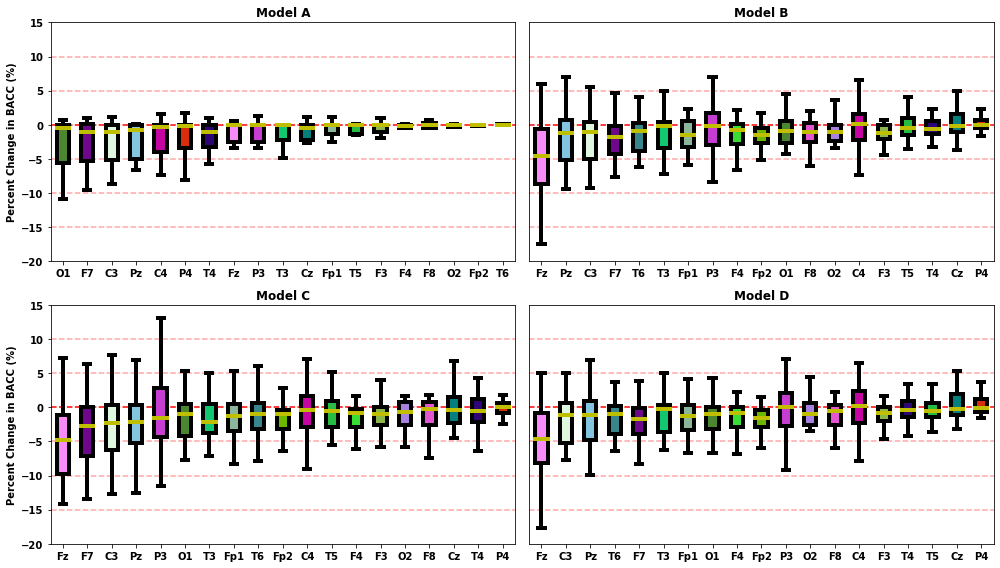

In [10]:
plt.figure(figsize=(14,8))
for i in range(1,5):      
    if i == 1:
        imp = np.squeeze(spatial_importance_a)
        title = 'Model A'
    elif i == 2:
        imp = np.squeeze(spatial_importance_b2)
        title = 'Model B'
    elif i == 3:
        imp = np.squeeze(spatial_importance_c2)
        title = 'Model C'
    elif i == 4:
        imp = np.squeeze(spatial_importance_d2)
        title = 'Model D'
        
    order = np.argsort(np.quantile(imp,0.25,axis=0))
    
    plt.subplot(2,2,i)
    for hline in range(-3,3):
        if hline != 0:
            plt.hlines([5*hline],0.5,19.5,'r','--',alpha=0.35)
        else:
            plt.hlines([5*hline],0.5,19.5,'r','--',alpha=1)    
    bplot = plt.boxplot(imp[:,order],patch_artist=True,showfliers=False);
    plt.yticks(weight='bold')
    plt.xticks(np.arange(1,20),np.array(channels)[order],weight='bold')
    plt.title(title,weight='bold')
    plt.ylim([-20,15])
    
    if i in [1,3]:
        plt.ylabel('Percent Change in BACC (%)',weight='bold')
    else:
        plt.yticks([])
    
    # Set Whisker Color
    for whisker in bplot['whiskers']:
        whisker.set(color='k',linewidth=4)
    
    # Set Caps Color
    for cap in bplot['caps']:
        cap.set(color='k',linewidth=4)
    
    # Set Box Outline Color
    for box in bplot['boxes']:
        box.set(color='k',linewidth=4)
        
    # Set Median Color
    for med in bplot['medians']:
        med.set(color='y',linewidth=4)
    
    # Set Face Color
    for count in range(19):
        patch = bplot['boxes'][count]
        np.random.seed(order[count])
        patch.set_facecolor(np.random.rand(3,))
    
plt.tight_layout()

    
plt.savefig("/home/users/cellis42/Spectral_Explainability/PreTraining/BHI2023/Spatial_Importance_seed3.png")

# Plot Spectral Explainability Results

In [15]:
# Get Mean of Spectral Explanations Across Sleep Models

spectral_importance_b2 = []
for i in range(25):
    spectral_importance_b2.append(np.mean(spectral_importance_b[:,i,:],axis=0))
    
spectral_importance_c2 = []
for i in range(25):
    spectral_importance_c2.append(np.mean(spectral_importance_c[:,i,:],axis=0))
    
spectral_importance_d2 = []
for i in range(25):
    spectral_importance_d2.append(np.mean(spectral_importance_d[:,i,:],axis=0))

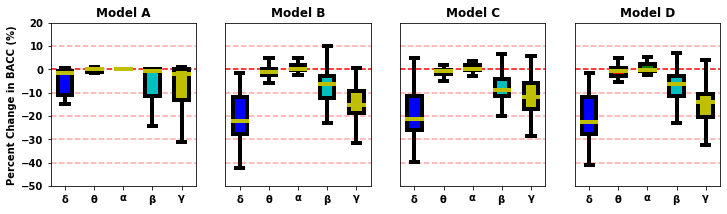

In [24]:
plt.figure(figsize=(12,3))
for i in range(1,5):
    if i == 1:
        imp = np.squeeze(spectral_importance_a)
        title = 'Model A'
    elif i == 2:
        imp = np.squeeze(spectral_importance_b2)
        title = 'Model B'
    elif i == 3:
        imp = np.squeeze(spectral_importance_c2)
        title = 'Model C'
    elif i == 4:
        imp = np.squeeze(spectral_importance_d2)
        title = 'Model D'
        
    plt.subplot(1,4,i)
    
    for hline in range(-4,2):
        if hline != 0:
            plt.hlines([10*hline],0.5,5.5,'r','--',alpha=0.35)
        else:
            plt.hlines([10*hline],0.5,5.5,'r','--',alpha=1)

    bplot = plt.boxplot(imp,patch_artist=True,showfliers=False);
    plt.xticks(np.arange(1,6),freq_bands)
    plt.yticks(weight='bold')
    plt.title(title,weight='bold')
    plt.ylim([-50,20])
    
    if i == 1:
        plt.ylabel('Percent Change in BACC (%)',weight='bold')
    else:
        plt.yticks([])
        
    # Set Whisker Color
    for whisker in bplot['whiskers']:
        whisker.set(color='k',linewidth=4)
    
    # Set Caps Color
    for cap in bplot['caps']:
        cap.set(color='k',linewidth=4)
    
    # Set Box Outline Color
    for box in bplot['boxes']:
        box.set(color='k',linewidth=4)
        
    # Set Median Color
    for med in bplot['medians']:
        med.set(color='y',linewidth=4)
    
    # Set Face color
    colors = ['b','r','g','c','y']
    for count in range(5):
        patch = bplot['boxes'][count]
        color = colors[count]
        patch.set_facecolor(color)
plt.savefig("/home/users/cellis42/Spectral_Explainability/PreTraining/BHI2023/Spectral_Importance_seed3.png")